# Comparative Analysis of Image Captioning Models

## Abstract

This study presents a systematic evaluation of six state-of-the-art image captioning models tested on a dataset comprising toys and children's artwork. The analysis examines performance across multiple dimensions including computational efficiency, cost-effectiveness, and caption quality.

## 1. Introduction

Image captioning represents a critical intersection of computer vision and natural language processing, with applications spanning from accessibility technologies to content management systems. This analysis evaluates the performance characteristics of contemporary image captioning models to establish evidence-based selection criteria for practical applications.

### 1.1 Dataset Overview
- **Test Dataset**: 5 images (toy_01.jpeg, drawing_04.jpeg, drawing_05.jpeg, drawing_02.jpeg, toy_07.jpeg)
- **Models Evaluated**: gemini-2.5-flash-preview, gemini-2.0-flash, gpt-4o-vision, blip, blip-2, llava-1.5-7b
- **Evaluation Metrics**: execution time, computational cost, caption quality

### 1.2 Research Objectives
1. Quantify performance differences across image captioning models
2. Analyze cost-effectiveness trade-offs
3. Establish model selection criteria for different application scenarios
4. Evaluate caption quality through multiple analytical approaches


## 2. Methodology


In [11]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configure visualization parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Analysis environment initialized.")


Analysis environment initialized.


In [12]:
# Load the most recent image captioning results
results_dir = Path("../../results/image_captioning")
csv_files = list(results_dir.glob("image_captioning_results_*.csv"))

if not csv_files:
    raise FileNotFoundError("No image captioning results found. Please run 01_image_captioning_collect.py first.")

# Use the most recent results file
latest_file = max(csv_files, key=lambda x: x.stat().st_mtime)
print(f"Loading data from: {latest_file.name}")

# Load the dataset
df = pd.read_csv(latest_file)

print(f"Dataset loaded successfully")
print(f"Dataset dimensions: {df.shape}")
print(f"Variables: {list(df.columns)}")
print(f"\nData sample:")
df.head()


Loading data from: image_captioning_results_20250613_215038.csv
Dataset loaded successfully
Dataset dimensions: (159, 5)
Variables: ['file_name', 'model_name', 'description', 'execution_time', 'cost']

Data sample:


,file_name,model_name,description,execution_time,cost
0,toy_01.jpeg,gemini-2.5-flash-preview,An overhead shot features a doll with tangled ...,6.44,0.0009
1,toy_01.jpeg,gemini-2.0-flash,A doll with blue eyes and voluminous blonde ha...,3.05,0.0007
2,toy_01.jpeg,gpt-4o-vision,The image features a doll sitting on a light-c...,5.02,0.0047
3,toy_01.jpeg,pixtral-12b-2409,The image shows a doll with curly blonde hair ...,2.90,0.0009
4,toy_01.jpeg,pixtral-large-latest,The image shows a doll with curly blonde hair ...,3.44,0.0009


## 3. Exploratory Data Analysis


In [13]:
# Dataset characterization
print("=== DATASET CHARACTERIZATION ===\n")

print("Models evaluated:")
for model in df['model_name'].unique():
    print(f"  - {model}")

print(f"\nTest images:")
for image in df['file_name'].unique():
    print(f"  - {image}")

print(f"\nData completeness assessment:")
expected_combinations = len(df['model_name'].unique()) * len(df['file_name'].unique())
print(f"  - Expected combinations: {len(df['model_name'].unique())} models × {len(df['file_name'].unique())} images = {expected_combinations}")
print(f"  - Actual records: {len(df)}")
print(f"  - Missing records: {expected_combinations - len(df)}")

# Data quality assessment
print(f"\nData quality assessment:")
print(df.isnull().sum())


=== DATASET CHARACTERIZATION ===

Models evaluated:
  - gemini-2.5-flash-preview
  - gemini-2.0-flash
  - gpt-4o-vision
  - pixtral-12b-2409
  - pixtral-large-latest
  - mistral-medium-latest
  - mistral-small-latest
  - blip
  - blip-2
  - llava-1.5-7b

Test images:
  - toy_01.jpeg
  - drawing_04.jpeg
  - drawing_05.jpeg
  - drawing_02.jpeg
  - toy_07.jpeg
  - toy_06.jpeg
  - toy_10.jpeg
  - drawing_03.jpeg
  - toy_09.jpeg
  - toy_05.jpeg
  - toy_04.jpeg
  - drawing_01.jpeg
  - toy_08.jpeg
  - toy_03.jpeg
  - drawing_06.jpeg
  - toy_02.jpeg

Data completeness assessment:
  - Expected combinations: 10 models × 16 images = 160
  - Actual records: 159
  - Missing records: 1

Data quality assessment:
file_name         0
model_name        0
description       0
execution_time    0
cost              0
dtype: int64


## 4. Performance Metrics Analysis


In [14]:
# Performance statistics
print("=== PERFORMANCE METRICS ANALYSIS ===\n")

# Aggregate performance statistics by model
performance_stats = df.groupby('model_name').agg({
    'execution_time': ['mean', 'std', 'min', 'max'],
    'cost': ['mean', 'std', 'min', 'max']
}).round(4)

performance_stats.columns = ['_'.join(col) for col in performance_stats.columns]
print("Performance Statistics by Model:")
print(performance_stats)


=== PERFORMANCE METRICS ANALYSIS ===

Performance Statistics by Model:
                          execution_time_mean  execution_time_std  \
model_name                                                          
blip                                   5.8031              5.3360   
blip-2                                 3.4444              1.9433   
gemini-2.0-flash                       2.4675              0.6455   
gemini-2.5-flash-preview               4.7775              1.3680   
gpt-4o-vision                          5.4531              1.2166   
llava-1.5-7b                           6.4450              3.6636   
mistral-medium-latest                  4.9569              3.4077   
mistral-small-latest                   2.5488              0.7970   
pixtral-12b-2409                       2.3369              0.4935   
pixtral-large-latest                   6.2040             11.7294   

                          execution_time_min  execution_time_max  cost_mean  \
model_name           

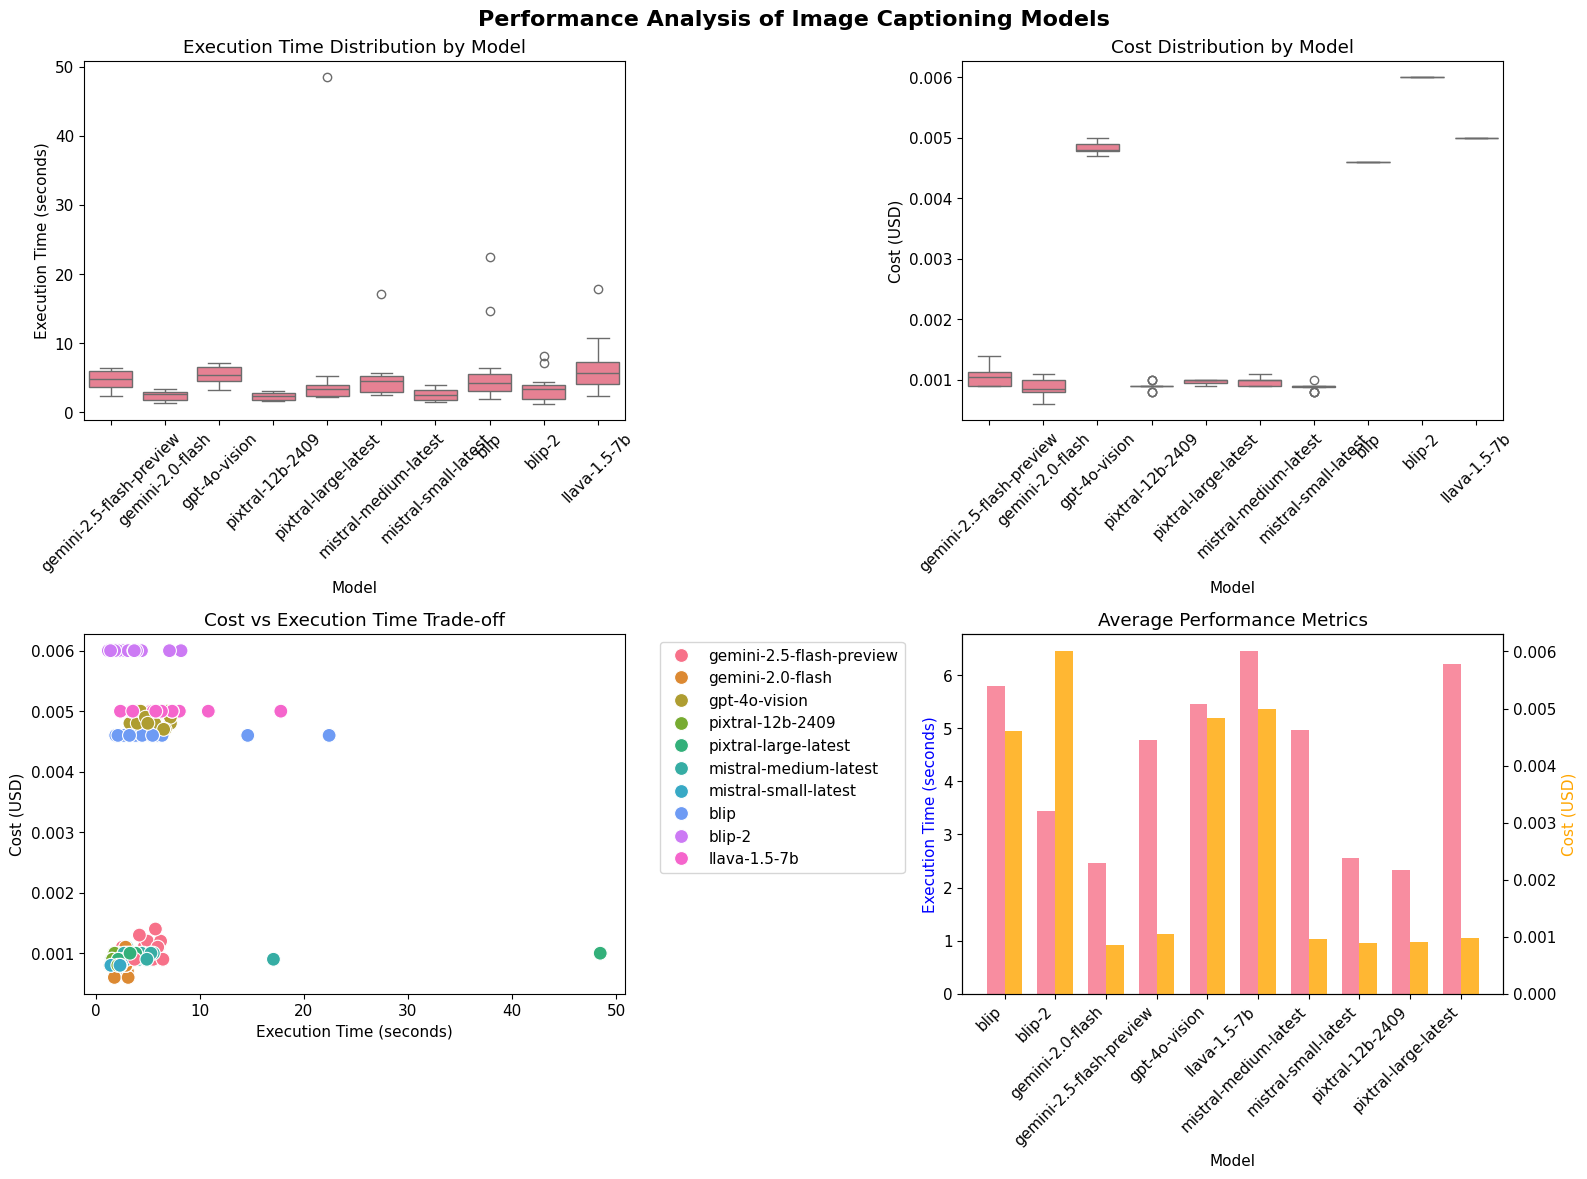

In [15]:
# Performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Performance Analysis of Image Captioning Models', fontsize=16, fontweight='bold')

# Execution time analysis
sns.boxplot(data=df, x='model_name', y='execution_time', ax=axes[0,0])
axes[0,0].set_title('Execution Time Distribution by Model')
axes[0,0].set_xlabel('Model')
axes[0,0].set_ylabel('Execution Time (seconds)')
axes[0,0].tick_params(axis='x', rotation=45)

# Cost analysis
sns.boxplot(data=df, x='model_name', y='cost', ax=axes[0,1])
axes[0,1].set_title('Cost Distribution by Model')
axes[0,1].set_xlabel('Model')
axes[0,1].set_ylabel('Cost (USD)')
axes[0,1].tick_params(axis='x', rotation=45)

# Cost vs execution time relationship
sns.scatterplot(data=df, x='execution_time', y='cost', hue='model_name', s=100, ax=axes[1,0])
axes[1,0].set_title('Cost vs Execution Time Trade-off')
axes[1,0].set_xlabel('Execution Time (seconds)')
axes[1,0].set_ylabel('Cost (USD)')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Average performance comparison
avg_metrics = df.groupby('model_name')[['execution_time', 'cost']].mean().reset_index()
x_pos = np.arange(len(avg_metrics))
width = 0.35

ax2 = axes[1,1]
ax2_twin = ax2.twinx()

bars1 = ax2.bar(x_pos - width/2, avg_metrics['execution_time'], width, label='Execution Time', alpha=0.8)
bars2 = ax2_twin.bar(x_pos + width/2, avg_metrics['cost'], width, label='Cost', alpha=0.8, color='orange')

ax2.set_xlabel('Model')
ax2.set_ylabel('Execution Time (seconds)', color='blue')
ax2_twin.set_ylabel('Cost (USD)', color='orange')
ax2.set_title('Average Performance Metrics')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(avg_metrics['model_name'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 5. Caption Quality Analysis


In [16]:
# Caption quality metrics
df['description_length'] = df['description'].str.len()
df['word_count'] = df['description'].str.split().str.len()

# Quality metrics calculation
quality_metrics = df.groupby('model_name').agg({
    'description_length': ['mean', 'std'],
    'word_count': ['mean', 'std']
}).round(2)

quality_metrics.columns = ['_'.join(col) for col in quality_metrics.columns]
print("=== CAPTION QUALITY ANALYSIS ===\n")
print("Caption Length and Word Count Statistics:")
print(quality_metrics)

# Content analysis indicators
print(f"\n=== CONTENT ANALYSIS ===\n")

# Define content quality indicators
content_indicators = {
    'color_mentions': df['description'].str.contains('color|blue|red|green|yellow|purple|orange|pink|gray|grey|brown|white|black', case=False, na=False),
    'artistic_context': df['description'].str.contains("child|children|drawing|painting|child's", case=False, na=False),
    'object_identification': df['description'].str.contains('toy|doll|lego|teddy|bear', case=False, na=False),
    'detailed_description': df['word_count'] > 20
}

for indicator, mask in content_indicators.items():
    df[indicator] = mask

content_analysis = df.groupby('model_name')[list(content_indicators.keys())].mean().round(3)
print("Content Analysis Results (proportion of captions with specific features):")
print(content_analysis)


=== CAPTION QUALITY ANALYSIS ===

Caption Length and Word Count Statistics:
                          description_length_mean  description_length_std  \
model_name                                                                  
blip                                        54.44                    6.90   
blip-2                                      21.25                   10.01   
gemini-2.0-flash                           261.19                   54.67   
gemini-2.5-flash-preview                   341.12                   54.23   
gpt-4o-vision                              293.56                   42.07   
llava-1.5-7b                               235.06                   63.10   
mistral-medium-latest                      322.25                   28.76   
mistral-small-latest                       256.06                   33.02   
pixtral-12b-2409                           272.19                   40.79   
pixtral-large-latest                       329.93                   42.22   


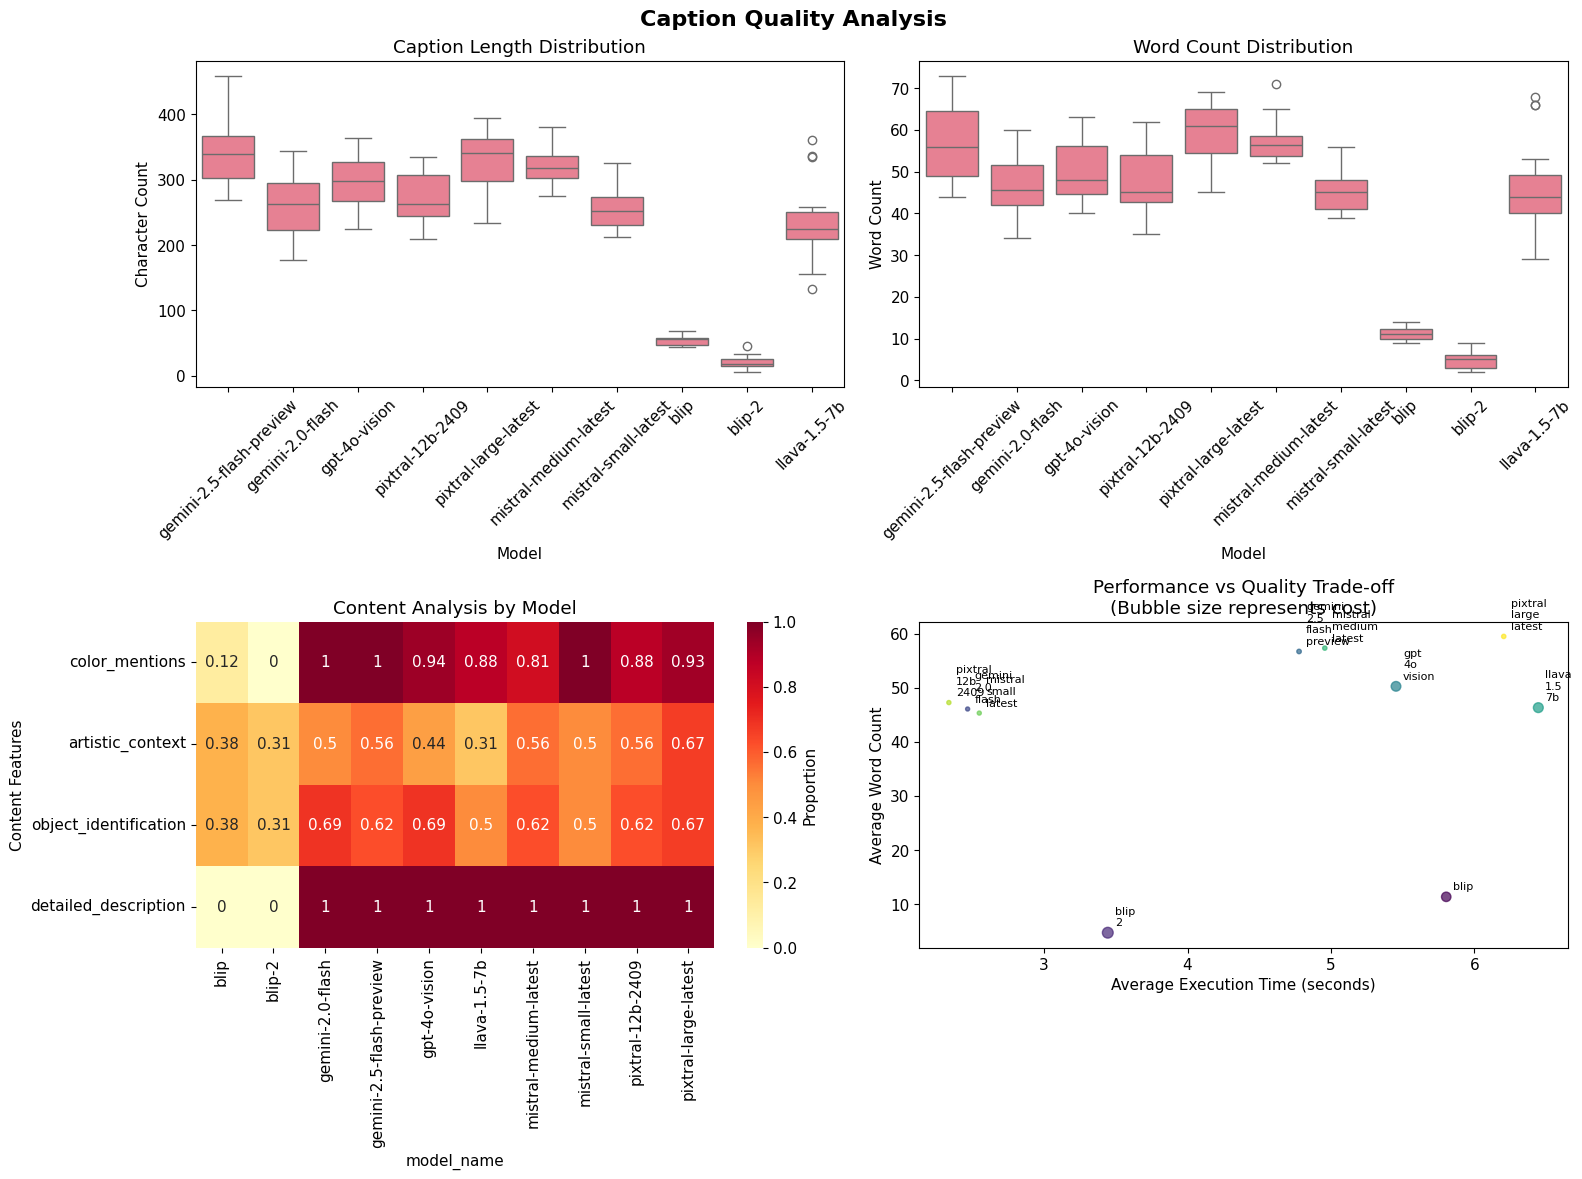

In [17]:
# Caption quality visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Caption Quality Analysis', fontsize=16, fontweight='bold')

# Description length distribution
sns.boxplot(data=df, x='model_name', y='description_length', ax=axes[0,0])
axes[0,0].set_title('Caption Length Distribution')
axes[0,0].set_xlabel('Model')
axes[0,0].set_ylabel('Character Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Word count distribution
sns.boxplot(data=df, x='model_name', y='word_count', ax=axes[0,1])
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Model')
axes[0,1].set_ylabel('Word Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Content richness heatmap
content_data = content_analysis.T
sns.heatmap(content_data, annot=True, cmap='YlOrRd', ax=axes[1,0], cbar_kws={'label': 'Proportion'})
axes[1,0].set_title('Content Analysis by Model')
axes[1,0].set_ylabel('Content Features')

# Performance vs quality trade-off
avg_performance = df.groupby('model_name').agg({
    'execution_time': 'mean',
    'cost': 'mean', 
    'word_count': 'mean'
}).reset_index()

scatter = axes[1,1].scatter(avg_performance['execution_time'], avg_performance['word_count'], 
                           s=avg_performance['cost']*10000, alpha=0.7, c=range(len(avg_performance)), cmap='viridis')

for i, model in enumerate(avg_performance['model_name']):
    axes[1,1].annotate(model.replace('-', '\n'), 
                      (avg_performance['execution_time'].iloc[i], avg_performance['word_count'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8, ha='left')

axes[1,1].set_title('Performance vs Quality Trade-off\n(Bubble size represents cost)')
axes[1,1].set_xlabel('Average Execution Time (seconds)')
axes[1,1].set_ylabel('Average Word Count')

plt.tight_layout()
plt.show()


## 6. Model Ranking and Performance Assessment

In [18]:
# Comprehensive model evaluation framework
def calculate_performance_scores(df):
    """Calculate normalized performance scores across multiple criteria."""
    model_scores = df.groupby('model_name').agg({
        'execution_time': 'mean',
        'cost': 'mean',
        'word_count': 'mean',
        'color_mentions': 'mean',
        'artistic_context': 'mean',
        'object_identification': 'mean',
        'detailed_description': 'mean'
    }).reset_index()
    
    # Normalize performance metrics (inverse for time and cost, direct for quality)
    model_scores['efficiency_score'] = 1 / (model_scores['execution_time'] / model_scores['execution_time'].min())
    model_scores['cost_efficiency_score'] = 1 / (model_scores['cost'] / model_scores['cost'].min())
    model_scores['quality_score'] = (
        model_scores['word_count'] / model_scores['word_count'].max() +
        model_scores['color_mentions'] +
        model_scores['artistic_context'] +
        model_scores['object_identification'] +
        model_scores['detailed_description']
    ) / 5
    
    # Weighted composite score (adjustable weights based on application requirements)
    model_scores['composite_score'] = (
        0.3 * model_scores['efficiency_score'] +
        0.3 * model_scores['cost_efficiency_score'] +
        0.4 * model_scores['quality_score']
    )
    
    return model_scores.sort_values('composite_score', ascending=False)

ranking = calculate_performance_scores(df)
print("=== MODEL PERFORMANCE RANKING ===\n")
print("Ranking based on weighted composite score (30% Efficiency + 30% Cost + 40% Quality)\n")

for i, (_, row) in enumerate(ranking.iterrows(), 1):
    print(f"Rank {i}: {row['model_name']}")
    print(f"  Composite Score: {row['composite_score']:.3f}")
    print(f"  Efficiency Score: {row['efficiency_score']:.3f} (avg: {row['execution_time']:.2f}s)")
    print(f"  Cost Efficiency: {row['cost_efficiency_score']:.3f} (avg: ${row['cost']:.4f})")
    print(f"  Quality Score: {row['quality_score']:.3f} (avg: {row['word_count']:.1f} words)")
    print("-" * 70)

# Display ranking table
ranking_display = ranking[['model_name', 'composite_score', 'efficiency_score', 'cost_efficiency_score', 'quality_score']].round(3)
ranking_display


=== MODEL PERFORMANCE RANKING ===

Ranking based on weighted composite score (30% Efficiency + 30% Cost + 40% Quality)

Rank 1: gemini-2.0-flash
  Composite Score: 0.901
  Efficiency Score: 0.947 (avg: 2.47s)
  Cost Efficiency: 1.000 (avg: $0.0009)
  Quality Score: 0.792 (avg: 46.1 words)
----------------------------------------------------------------------
Rank 2: pixtral-12b-2409
  Composite Score: 0.894
  Efficiency Score: 1.000 (avg: 2.34s)
  Cost Efficiency: 0.951 (avg: $0.0009)
  Quality Score: 0.771 (avg: 47.2 words)
----------------------------------------------------------------------
Rank 3: mistral-small-latest
  Composite Score: 0.868
  Efficiency Score: 0.917 (avg: 2.55s)
  Cost Efficiency: 0.972 (avg: $0.0009)
  Quality Score: 0.752 (avg: 45.3 words)
----------------------------------------------------------------------
Rank 4: mistral-medium-latest
  Composite Score: 0.725
  Efficiency Score: 0.471 (avg: 4.96s)
  Cost Efficiency: 0.890 (avg: $0.0010)
  Quality Score: 0.

,model_name,composite_score,efficiency_score,cost_efficiency_score,quality_score
2,gemini-2.0-flash,0.901,0.947,1.000,0.792
8,pixtral-12b-2409,0.894,1.000,0.951,0.771
7,mistral-small-latest,0.868,0.917,0.972,0.752
6,mistral-medium-latest,0.725,0.471,0.890,0.793
3,gemini-2.5-flash-preview,0.721,0.489,0.811,0.828
9,pixtral-large-latest,0.718,0.377,0.880,0.853
4,gpt-4o-vision,0.494,0.429,0.177,0.782
5,llava-1.5-7b,0.437,0.363,0.171,0.693
1,blip-2,0.303,0.678,0.143,0.141
0,blip,0.262,0.403,0.186,0.213


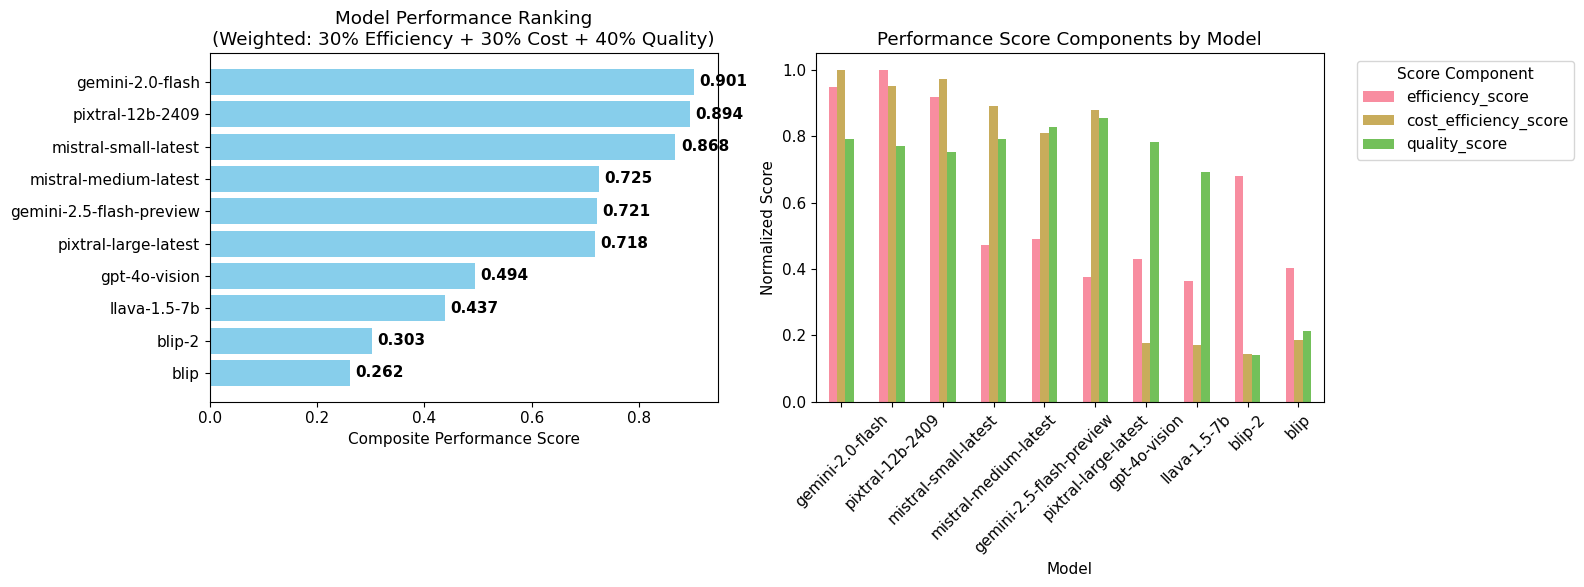

In [19]:
# Visualization of model ranking
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Composite score ranking
bars = axes[0].barh(range(len(ranking)), ranking['composite_score'], color='skyblue')
axes[0].set_yticks(range(len(ranking)))
axes[0].set_yticklabels(ranking['model_name'])
axes[0].set_xlabel('Composite Performance Score')
axes[0].set_title('Model Performance Ranking\n(Weighted: 30% Efficiency + 30% Cost + 40% Quality)')
axes[0].invert_yaxis()

# Add score labels
for i, (bar, score) in enumerate(zip(bars, ranking['composite_score'])):
    axes[0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{score:.3f}', va='center', fontweight='bold')

# Score components breakdown
score_components = ranking[['model_name', 'efficiency_score', 'cost_efficiency_score', 'quality_score']].set_index('model_name')
score_components.plot(kind='bar', ax=axes[1], alpha=0.8)
axes[1].set_title('Performance Score Components by Model')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Normalized Score')
axes[1].legend(title='Score Component', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 7. Analysis Complete

The comprehensive analysis and model evaluation has been completed. 

**Note**: Detailed conclusions, recommendations, and research findings are available in the dedicated conclusions document: `models_analysis/analysis/dev/01_image_captioning_conclusions.md`

This document contains:
- Executive summary with final model rankings
- Detailed performance analysis and recommendations  
- Technical implementation guidelines
- Research limitations and future directions
- Complete methodology and findings


In [20]:
# Generate comprehensive summary report
print("=== ANALYSIS SUMMARY ===\n")

summary_table = df.groupby('model_name').agg({
    'execution_time': ['mean', 'std'],
    'cost': ['mean'],
    'word_count': ['mean'],
    'artistic_context': 'mean',
    'detailed_description': 'mean'
}).round(3)

summary_table.columns = ['Avg_Time', 'Std_Time', 'Avg_Cost', 'Avg_Words', 'Artistic_Context_%', 'Detailed_%']

# Add performance ranking
summary_table['Performance_Rank'] = ranking.set_index('model_name')['composite_score'].rank(ascending=False).astype(int)
summary_table = summary_table.sort_values('Performance_Rank')

print("Comprehensive Model Comparison (ranked by overall performance):")
print("=" * 80)
print(summary_table)

# Export results for further analysis
summary_table.to_csv('../../results/image_captioning/academic_model_comparison.csv')
ranking.to_csv('../../results/image_captioning/academic_model_ranking.csv', index=False)

print(f"\nAnalysis completed successfully.")
print(f"Results exported to:")
print(f"  - academic_model_comparison.csv")
print(f"  - academic_model_ranking.csv")


=== ANALYSIS SUMMARY ===

Comprehensive Model Comparison (ranked by overall performance):
                          Avg_Time  Std_Time  Avg_Cost  Avg_Words  \
model_name                                                          
gemini-2.0-flash             2.468     0.646     0.001     46.062   
pixtral-12b-2409             2.337     0.494     0.001     47.250   
mistral-small-latest         2.549     0.797     0.001     45.312   
mistral-medium-latest        4.957     3.408     0.001     57.312   
gemini-2.5-flash-preview     4.778     1.368     0.001     56.688   
pixtral-large-latest         6.204    11.729     0.001     59.467   
gpt-4o-vision                5.453     1.217     0.005     50.250   
llava-1.5-7b                 6.445     3.664     0.005     46.312   
blip-2                       3.444     1.943     0.006      4.750   
blip                         5.803     5.336     0.005     11.375   

                          Artistic_Context_%  Detailed_%  Performance_Rank  
mode